 
# Leasing Price Predictor
**Data Science Lab**
  - Tobias Ponesch
  - Sina Haghgoo
  - Finnian John Dempsey
  - Adrian Lehrner
---

## Libraries

In [81]:
import pandas as pd
import numpy as np

import pickle
#from compress_pickle import dump, load
import warnings
import sklearn
from sklearn.base import BaseEstimator, TransformerMixin
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

***

## Import the dataset

In [2]:
df = pd.read_excel('data/dataset_2023.xlsx')
df = df.drop('Unnamed: 0', axis = 1)
df

,brand_name,model_name,milage,first_registration,duration,gear,monthly_fee,emission_value,consumption,horsepower,kilowatts,fuel_type
0,Skoda,Octavia ŠKODA Combi Style TDI DSG,201 km,03/2023,48 Monat (anpassbar),Automatik,"574,01 €",119 g/km,"5,0 l/100 km",150 PS,110 kW,Diesel
1,Volkswagen,T-Cross VW Life TSI,201 km,03/2023,48 Monat (anpassbar),Manuelle Schaltung,"382,58 €",131 g/km,"6,0 l/100 km",95 PS,70 kW,Benzin
2,Seat,Ibiza Austria Edition,15.000 km,10/2022,48 Monat (anpassbar),Manuelle Schaltung,"239,62 €",120 g/km,"5,0 l/100 km",80 PS,59 kW,Benzin
3,Volkswagen,Polo VW,1 km,01/2023,48 Monat (anpassbar),Manuelle Schaltung,"309,11 €",127 g/km,"6,0 l/100 km",80 PS,59 kW,Benzin
4,Audi,A4 Avant 40 TDI quattro S line,105.301 km,12/2019,48 Monat (anpassbar),Automatik,"587,75 €",138 g/km,"5,0 l/100 km",190 PS,140 kW,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
19053,Seat,Ateca FR 2.0 TDI DSG 4Drive,201 km,01/2023,48 Monat (anpassbar),Automatik,"692,03 €",146 g/km,"6,0 l/100 km",150 PS,110 kW,Diesel
19054,Skoda,Octavia ŠKODA Combi Style TDI DSG,201 km,03/2023,48 Monat (anpassbar),Automatik,"574,01 €",187 g/km,"8,0 l/100 km",150 PS,110 kW,Diesel
19055,Audi,A4 Avant 40 TDI quattro S line,105.301 km,12/2019,48 Monat (anpassbar),Automatik,"587,75 €",143 g/km,"6,0 l/100 km",190 PS,140 kW,Diesel
19056,Volkswagen,Polo VW,18.903 km,06/2020,48 Monat (anpassbar),Manuelle Schaltung,"256,33 €",40 g/km,"2,0 l/100 km",80 PS,59 kW,Benzin


In [3]:
#Enter the actual column names
brand = "brand_name"
model = "model_name"
milage = "milage"
registration = "first_registration"
duration = "duration"
gear = "gear"
fee = "monthly_fee"
emission = "emission_value"
consumption = "consumption"
horsepower = "horsepower"
kilowatts = "kilowatts"
fuel = "fuel_type"

rename_columns = {
    brand:"brand",
    model:"model",
    milage:"milage",
    registration:"registration",
    duration:"duration",
    gear:"gear",
    fee:"fee",
    emission:"emission",
    consumption:"consumption",
    horsepower:"horsepower",
    kilowatts:"kilowatts",
    fuel:"fuel"
}

df = df.rename(columns=rename_columns)
df

,brand,model,milage,registration,duration,gear,fee,emission,consumption,horsepower,kilowatts,fuel
0,Skoda,Octavia ŠKODA Combi Style TDI DSG,201 km,03/2023,48 Monat (anpassbar),Automatik,"574,01 €",119 g/km,"5,0 l/100 km",150 PS,110 kW,Diesel
1,Volkswagen,T-Cross VW Life TSI,201 km,03/2023,48 Monat (anpassbar),Manuelle Schaltung,"382,58 €",131 g/km,"6,0 l/100 km",95 PS,70 kW,Benzin
2,Seat,Ibiza Austria Edition,15.000 km,10/2022,48 Monat (anpassbar),Manuelle Schaltung,"239,62 €",120 g/km,"5,0 l/100 km",80 PS,59 kW,Benzin
3,Volkswagen,Polo VW,1 km,01/2023,48 Monat (anpassbar),Manuelle Schaltung,"309,11 €",127 g/km,"6,0 l/100 km",80 PS,59 kW,Benzin
4,Audi,A4 Avant 40 TDI quattro S line,105.301 km,12/2019,48 Monat (anpassbar),Automatik,"587,75 €",138 g/km,"5,0 l/100 km",190 PS,140 kW,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
19053,Seat,Ateca FR 2.0 TDI DSG 4Drive,201 km,01/2023,48 Monat (anpassbar),Automatik,"692,03 €",146 g/km,"6,0 l/100 km",150 PS,110 kW,Diesel
19054,Skoda,Octavia ŠKODA Combi Style TDI DSG,201 km,03/2023,48 Monat (anpassbar),Automatik,"574,01 €",187 g/km,"8,0 l/100 km",150 PS,110 kW,Diesel
19055,Audi,A4 Avant 40 TDI quattro S line,105.301 km,12/2019,48 Monat (anpassbar),Automatik,"587,75 €",143 g/km,"6,0 l/100 km",190 PS,140 kW,Diesel
19056,Volkswagen,Polo VW,18.903 km,06/2020,48 Monat (anpassbar),Manuelle Schaltung,"256,33 €",40 g/km,"2,0 l/100 km",80 PS,59 kW,Benzin


In [4]:
SEED = 2023
TARGET_name = "fee"
FEATURE_names = df.drop(TARGET_name, axis=1).columns

***

## First Preprocessing

In [5]:
class CalculateAge(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
    def fit(self, X, y=None):
        return self

    def get_feature_names_out(self):
        pass
    
    def transform(self, X, y=None):
        print(self.columns)
        def calculate_age(registration_date):
            if registration_date == "Neuwagen":
                return 0
            else:
                today = datetime.now()
                date = datetime.strptime(registration_date, "%m/%Y")
                delta = relativedelta(today, date)
                return (delta.years * 12) + delta.months
        Xc = X.copy()
        if self.columns:
            columns = self.columns
        else:
            columns = Xc.columns
        Xc[columns[0]] = Xc[columns[0]].replace(["","nan"], np.nan)
        Xc[columns[0]] = Xc[columns[0]].apply(calculate_age)
        return Xc

class RemoveUnits(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        def extractFloats(input):
            try:
                input = input.split(" ")[0]
                f = float(input.replace('.','').replace(',','.'))
                return(f)
            except AttributeError:
                return input        
        
        X_=X.copy()
        columns = X.columns
        X_[columns] = X_[columns].apply(lambda col: col.replace(["","nan"], np.nan))
        X_[columns] = X_[columns].apply(lambda col: col.apply(extractFloats))
        return X_
        
    def get_feature_names_out(self):
        pass
       

In [6]:
units = ["milage", "duration", "fee", "emission", "consumption", "horsepower", "kilowatts"]

basicpreprocessor = ColumnTransformer(
    transformers=[
        ('age', CalculateAge(),["registration"]),
        ('unit', RemoveUnits(),units)
    ],
    remainder = "passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

df = basicpreprocessor.fit_transform(df)

None


In [78]:
basicpreprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('age', CalculateAge(), ['registration']),
                                ('unit', RemoveUnits(),
                                 ['milage', 'duration', 'fee', 'emission',
                                  'consumption', 'horsepower', 'kilowatts'])],
                  verbose_feature_names_out=False)

In [12]:
df

,registration,milage,duration,fee,emission,consumption,horsepower,kilowatts,brand,model,gear,fuel
0,2,201.0,48.0,574.01,119.0,5.0,150.0,110.0,Skoda,Octavia ŠKODA Combi Style TDI DSG,Automatik,Diesel
1,2,201.0,48.0,382.58,131.0,6.0,95.0,70.0,Volkswagen,T-Cross VW Life TSI,Manuelle Schaltung,Benzin
2,7,15000.0,48.0,239.62,120.0,5.0,80.0,59.0,Seat,Ibiza Austria Edition,Manuelle Schaltung,Benzin
3,4,1.0,48.0,309.11,127.0,6.0,80.0,59.0,Volkswagen,Polo VW,Manuelle Schaltung,Benzin
4,41,105301.0,48.0,587.75,138.0,5.0,190.0,140.0,Audi,A4 Avant 40 TDI quattro S line,Automatik,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
19053,4,201.0,48.0,692.03,146.0,6.0,150.0,110.0,Seat,Ateca FR 2.0 TDI DSG 4Drive,Automatik,Diesel
19054,2,201.0,48.0,574.01,187.0,8.0,150.0,110.0,Skoda,Octavia ŠKODA Combi Style TDI DSG,Automatik,Diesel
19055,41,105301.0,48.0,587.75,143.0,6.0,190.0,140.0,Audi,A4 Avant 40 TDI quattro S line,Automatik,Diesel
19056,35,18903.0,48.0,256.33,40.0,2.0,80.0,59.0,Volkswagen,Polo VW,Manuelle Schaltung,Benzin


In [8]:
TARGET = pd.DataFrame(df["fee"])
num_FEATURES = df[df.select_dtypes(include=['float64', 'int64']).columns].drop("fee", axis=1)
cat_FEATURES = df[df.select_dtypes(exclude=['float64', 'int64']).columns]

***

## Explanatory Data Analysis

### Traget variable

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

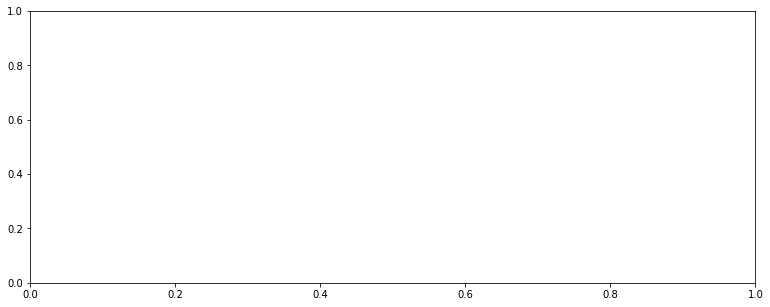

In [11]:
# Histogram
hist_color = 'red'
title_font_size = 16
label_font_size = 12
plt.figure(figsize=(13,5))
sns.histplot(df['fee'], kde=True, color=hist_color)
plt.title('Monthly Fee Distribution - Histogram', fontsize=title_font_size)
plt.xlabel('Monthly Fee', fontsize=label_font_size)
plt.xticks(ticks=plt.xticks()[0][::1])  
plt.ylabel('Monthly Fee Distribution', fontsize=label_font_size)
plt.grid(True)
plt.show()

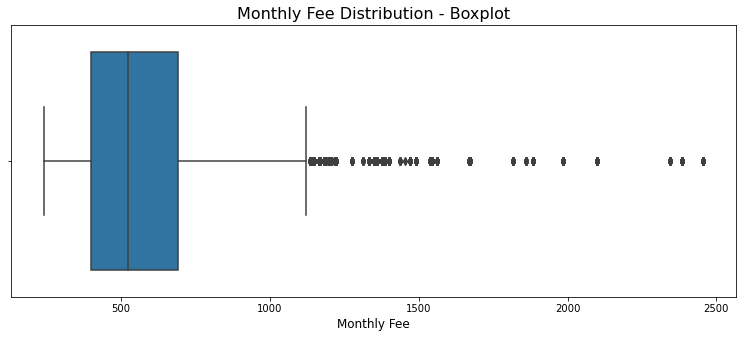

In [ ]:
# Boxplot
plt.figure(figsize=(13,5))
sns.boxplot(x=df['fee'])
plt.title('Monthly Fee Distribution - Boxplot', fontsize=title_font_size)
plt.xlabel('Monthly Fee', fontsize=label_font_size)
plt.show()

### Numerical Feature Variables

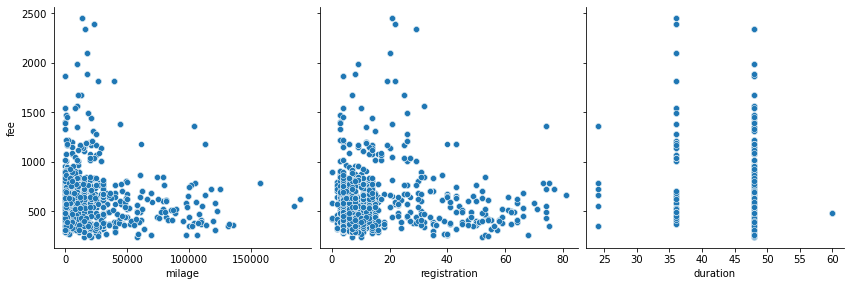

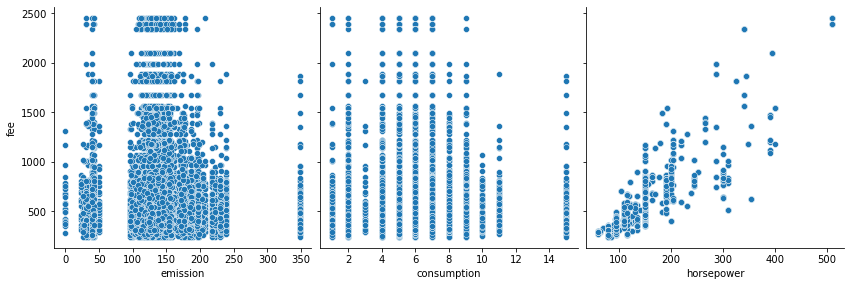

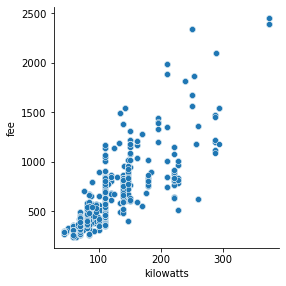

In [ ]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('milage', 'registration', 'duration')
pp('emission', 'consumption', 'horsepower')

def pp(x):
    sns.pairplot(df, x_vars=[x], y_vars='fee',height=4, aspect=1, kind='scatter')
    plt.show()

pp('kilowatts')

#### Skewness of numerical variables

/Users/tobias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tobias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tobias/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

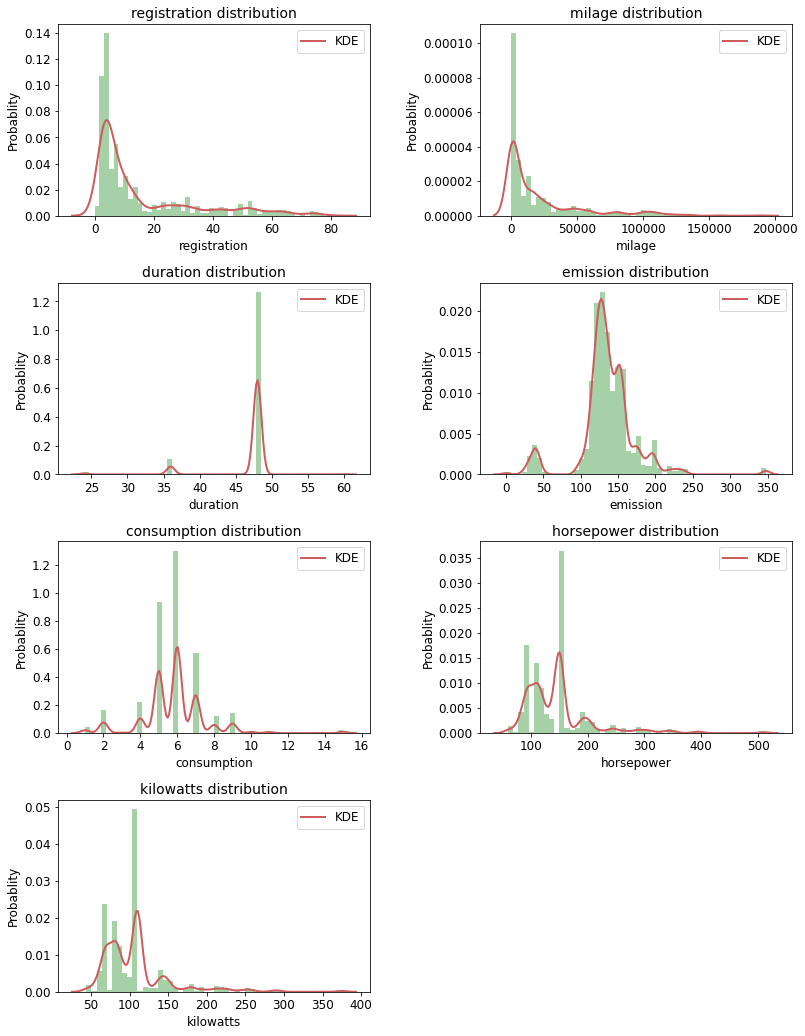

In [ ]:
num_FEATURES_hist = num_FEATURES.dropna()

plt.figure(figsize=(12,16))

for i, col in enumerate(num_FEATURES_hist.columns):
    # TAKE A LOOK AT THE IDX VARIABLE!!!!!!
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_FEATURES_hist[col], color='forestgreen', kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35, wspace=0.35)
plt.show()

### Categporical Feature Variables

In [ ]:
cat_FEATURES

,brand,model,gear,fuel
0,Skoda,Octavia ŠKODA Combi Style TDI DSG,Automatik,Diesel
1,Volkswagen,T-Cross VW Life TSI,Manuelle Schaltung,Benzin
2,Seat,Ibiza Austria Edition,Manuelle Schaltung,Benzin
3,Volkswagen,Polo VW,Manuelle Schaltung,Benzin
4,Audi,A4 Avant 40 TDI quattro S line,Automatik,Diesel
...,...,...,...,...
19053,Seat,Ateca FR 2.0 TDI DSG 4Drive,Automatik,Diesel
19054,Skoda,Octavia ŠKODA Combi Style TDI DSG,Automatik,Diesel
19055,Audi,A4 Avant 40 TDI quattro S line,Automatik,Diesel
19056,Volkswagen,Polo VW,Manuelle Schaltung,Benzin


Text(0.5, 1.0, 'Gear Frequencies')

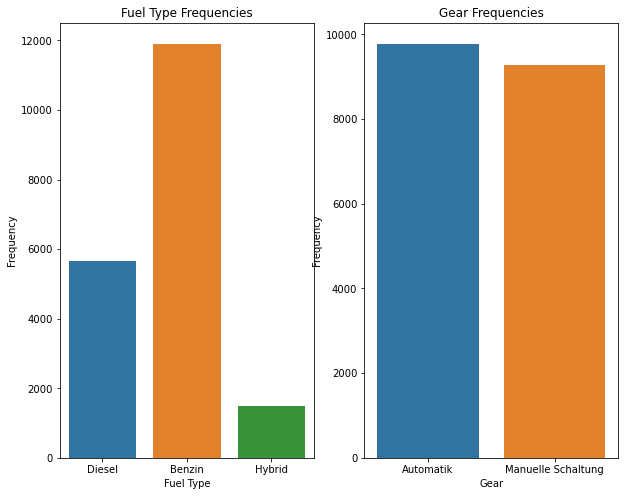

In [ ]:
# Create subplots for each categorical variable

fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(10, 8))

# Fuel type barplot
sns.countplot(x='fuel', data=cat_FEATURES, ax=axs[0])
axs[0].set_xlabel('Fuel Type')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Fuel Type Frequencies')

# Gear barplot
sns.countplot(x='gear', data=cat_FEATURES, ax=axs[1])
axs[1].set_xlabel('Gear')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Gear Frequencies')

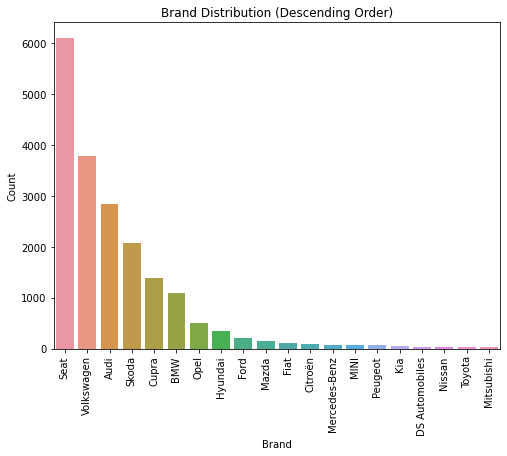

In [ ]:

# Assuming your DataFrame is called 'df'
brand_counts = df['brand'].value_counts()

# Sort the brand counts in descending order
brand_counts = brand_counts.sort_values(ascending=False)

# Plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='brand', order=brand_counts.index)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Brand Distribution (Descending Order)')
plt.xticks(rotation=90)
plt.show()




In [ ]:
## SINA SCHAUST GUCKST

# plt.figure(figsize=(25, 6))

# df_brand = pd.DataFrame(df.groupby(['brand'])['fee'].mean().sort_values(ascending = False))
# df_brand.plot.bar()
# plt.title('Monthly fee vs brand_name')
# plt.show()

# df_fueltype = pd.DataFrame(df.groupby(['fuel'])['fee'].mean().sort_values(ascending = False))
# df_fueltype.plot.bar()
# plt.title('Fuel Type vs Average Price')
# plt.show()

# df_gear = pd.DataFrame(df.groupby(['gear'])['fee'].mean().sort_values(ascending = False))
# df_gear.plot.bar()
# plt.title('gear vs Average Price')
# plt.show()

### Heatmap (Correlations)

In [ ]:
num_FEATURES

In [22]:
##SINA MACHEN!!###

# setting figure size
# plt.figure(figsize=(10,7))
# df_corr=df.drop(cat_FEATURES.columns).corr()

# heatmap
# sns.heatmap(num_FEATURES_corr, annot=True, linewidths=1.01, fmt = ".2f", annot_kws={"size": 12}, linecolor='white', cmap="YlGnBu")

# plt.xticks(rotation=45)
# plt.yticks(rotation=0)
# plt.savefig('correaltion_heatmap.png', dpi = 100, bbox_inches="tight")
# plt.show()

---

## Preprocessing and Feature Engineering

### Missing Values


In [28]:
missing_values = df.isnull().sum()

print("Summary of Missing Values:")
print(missing_values)

Summary of Missing Values:
registration      0
milage            0
duration          0
fee               0
emission        612
consumption     612
horsepower        0
kilowatts         0
brand             0
model             0
gear              0
fuel              0
dtype: int64


### Cardinality of non-numeric features

In [31]:
unique_counts = cat_FEATURES.nunique()
print(unique_counts)

brand     20
model    346
gear       2
fuel       3
dtype: int64


### Problems with splitting

When splitting the dataset by using "train_test_split" we need to use stratification so that one-hot encoding works.
This creates the problem, that entries of the model column, that exist only once OR Twice can not be splitted using stratify. We have three possible approaches:
- drop once or twice appearing single entries of "model"
- duplicate or tripple once or twice appreaing entries of "model"
- create combined category for those models
- **use a custom splitting algorithm**

for now we desided to drop those entries -> Do other approach later!!!!

In [118]:
old_shape = df.shape[0]

(19058, 12)

In [119]:
few_instances_model = df.groupby("model").filter(lambda x: len(x) < 3)["model"].unique()
df=df[~df["model"].isin(few_instances_model)]
df.shape
print("Models dropped:", old_shape[0]-df.shape[0])

(19039, 12)

### Out of Sample Dataset

In [120]:
df_sample, df_osample = train_test_split(df, test_size=0.15, random_state=SEED, stratify=df[["model"]])

In [121]:
print("Size of the sample data:",df_sample.shape, "with a mean of: ",df_sample["fee"].mean(),
    "\nSize of out of sample data:",df_osample.shape, "with a mean of: ",df_osample["fee"].mean())

Size of the sample data: (16183, 12) with a mean of:  593.0066569857258 
Size of out of sample data: (2856, 12) with a mean of:  592.3941316526611


### Train and Test slpit

In [123]:
X_sample = df_sample.drop(TARGET_name,axis=1)
Y_sample = df_sample[TARGET_name]

X_train, X_test, y_train, y_test = train_test_split(X_sample, Y_sample, test_size=0.25, random_state=SEED, stratify=X_sample[["model"]])
print(X_train.shape)
print(X_test.shape)

(12137, 11)
(4046, 11)


### Transformer Pipelines

In [125]:
numeric_features = num_FEATURES.columns
categorical_features = cat_FEATURES.columns

In [126]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='error', sparse_output=False, drop = 'first'))])

preprocessor = ColumnTransformer(
    transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)    
    ])

preprocessor.fit(X_train)

cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
columns_pipeline = np.append(cat_columns, numeric_features)

In [96]:
asdf

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['registration', 'milage', 'duration', 'emission', 'consumption',
       'horsepower', 'kilowatts'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 Index(['brand', 'model', 'gear', 'fuel'], dtype='object'))])

In [74]:
len(columns_pipeline)

372

## Machine Learning Modeling

### Choosing appropriate metrix & customization approach

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    #'max_depth': randint(3, 10),
    #'regressor__max_depth': [5, 8, 10],
    'regressor__min_samples_split': randint(2, 8),
    'regressor__min_samples_leaf': randint(1, 4)
}

# Create a new pipeline with the decision tree regression model
decisionTree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    # Decision tree regression model
    ("regressor", DecisionTreeRegressor())
])

# Perform randomized search with cross-validation
decisionTree_randomized_search = RandomizedSearchCV(decisionTree_pipeline, param_dist, n_iter=10, cv=5)
decisionTree_randomized_search.fit(X_train, y_train)


print('Score on training-set is: ', decisionTree_randomized_search.score(X_train, y_train))
print('Score on test-set is: ', decisionTree_randomized_search.score(X_test, y_test))

# Get the best hyperparameter values and model performance
best_params = decisionTree_randomized_search.best_params_

Score on training-set is:  0.9998728085946703
Score on test-set is:  0.9986970455391292


In [135]:
best_params

{'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2}

## Check Scikit-learn and python version

In [36]:
import sklearn
sklearn.__version__
if(sklearn.__version__!="1.2.2"):
    try:
        !pip install --upgrade numpy
        !pip install --upgrade pandas
        !pip install --upgrade scikit-learn
    except:
        print("Check your Python version. Has to be >3.8!")
        import sys
        print(sys.version)
